In [8]:
# Standard library imports
import warnings

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('credit_card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [14]:
df=df.rename(columns={'default.payment.next.month' : 'payment'})

In [16]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  payment  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [18]:
x=df.drop(['ID','payment'],axis=1)

In [20]:
y=df['payment']

In [24]:
y.value_counts()

payment
0    23364
1     6636
Name: count, dtype: int64

In [80]:
#from imblearn.under_sampling import NearMiss
#rnd=NearMiss()
#x_new,y_new=rnd.fit_resample(x,y)


In [82]:
#y_new.value_counts()

payment
0    6636
1    6636
Name: count, dtype: int64

In [96]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
rfe=RFE(estimator=classifier,n_features_to_select=10)

In [98]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [99]:
feature_support=rfe.support_
feature_rank=rfe.ranking_

In [102]:
for feature,rank in zip(x.columns,feature_rank):
    print(f'Feature:{feature},Rank:{rank}')

Feature:LIMIT_BAL,Rank:8
Feature:SEX,Rank:1
Feature:EDUCATION,Rank:1
Feature:MARRIAGE,Rank:1
Feature:AGE,Rank:1
Feature:PAY_0,Rank:1
Feature:PAY_2,Rank:1
Feature:PAY_3,Rank:1
Feature:PAY_4,Rank:1
Feature:PAY_5,Rank:1
Feature:PAY_6,Rank:1
Feature:BILL_AMT1,Rank:9
Feature:BILL_AMT2,Rank:14
Feature:BILL_AMT3,Rank:11
Feature:BILL_AMT4,Rank:13
Feature:BILL_AMT5,Rank:7
Feature:BILL_AMT6,Rank:12
Feature:PAY_AMT1,Rank:2
Feature:PAY_AMT2,Rank:3
Feature:PAY_AMT3,Rank:6
Feature:PAY_AMT4,Rank:4
Feature:PAY_AMT5,Rank:5
Feature:PAY_AMT6,Rank:10


In [104]:
rfe.score(x,y)

0.8099333333333333

# embaded method

In [106]:
from sklearn.linear_model import LogisticRegression
lrm=LogisticRegression(penalty='l1',solver='liblinear')

In [108]:
lrm.fit(x,y)

LogisticRegression(penalty='l1', solver='liblinear')

In [110]:
coeffient=lrm.coef_

In [116]:
for feature,coefficents in zip(x.columns,coeffient[0]):
    print(f'Feature:{feature},Coefficent:{coefficents}')

Feature:LIMIT_BAL,Coefficent:-7.666862990889938e-07
Feature:SEX,Coefficent:-0.11029047730632657
Feature:EDUCATION,Coefficent:-0.10208982931692487
Feature:MARRIAGE,Coefficent:-0.1569320842928866
Feature:AGE,Coefficent:0.007232713202351315
Feature:PAY_0,Coefficent:0.5771444705970181
Feature:PAY_2,Coefficent:0.08270655671892456
Feature:PAY_3,Coefficent:0.07208206283573401
Feature:PAY_4,Coefficent:0.023864301870623605
Feature:PAY_5,Coefficent:0.03394674923812955
Feature:PAY_6,Coefficent:0.008001933867606694
Feature:BILL_AMT1,Coefficent:-5.456687066764983e-06
Feature:BILL_AMT2,Coefficent:2.291882649684323e-06
Feature:BILL_AMT3,Coefficent:1.3988767715287588e-06
Feature:BILL_AMT4,Coefficent:-1.85583043442214e-07
Feature:BILL_AMT5,Coefficent:6.133657550138669e-07
Feature:BILL_AMT6,Coefficent:3.975297298607008e-07
Feature:PAY_AMT1,Coefficent:-1.3604900257137365e-05
Feature:PAY_AMT2,Coefficent:-9.652454950455845e-06
Feature:PAY_AMT3,Coefficent:-2.7412573068390393e-06
Feature:PAY_AMT4,Coefficent:

In [118]:
lrm.score(x,y)

0.8111

# filter Methods - Extra Trees Classifier

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
extc=ExtraTreesClassifier()
extc.fit(x,y)

ExtraTreesClassifier()

In [122]:
feature_importance=extc.feature_importances_

In [124]:
feature_importance

array([0.06726204, 0.01261003, 0.03319883, 0.02133513, 0.06629609,
       0.09727695, 0.0435085 , 0.03356915, 0.02956227, 0.03103594,
       0.03240336, 0.04970037, 0.04710364, 0.04488832, 0.04426545,
       0.04300885, 0.04448207, 0.04390629, 0.04255671, 0.04206488,
       0.04117091, 0.04258934, 0.04620488])

In [126]:
imp=pd.DataFrame(feature_importance,columns=['gain_score'])
imp

gain_score
0     0.067262
1     0.012610
2     0.033199
3     0.021335
4     0.066296
5     0.097277
6     0.043508
7     0.033569
8     0.029562
9     0.031036
10    0.032403
11    0.049700
12    0.047104
13    0.044888
14    0.044265
15    0.043009
16    0.044482
17    0.043906
18    0.042557
19    0.042065
20    0.041171
21    0.042589
22    0.046205

In [128]:
cols=pd.DataFrame(x.columns,columns=['Feature_Name'])
cols

Feature_Name
0     LIMIT_BAL
1           SEX
2     EDUCATION
3      MARRIAGE
4           AGE
5         PAY_0
6         PAY_2
7         PAY_3
8         PAY_4
9         PAY_5
10        PAY_6
11    BILL_AMT1
12    BILL_AMT2
13    BILL_AMT3
14    BILL_AMT4
15    BILL_AMT5
16    BILL_AMT6
17     PAY_AMT1
18     PAY_AMT2
19     PAY_AMT3
20     PAY_AMT4
21     PAY_AMT5
22     PAY_AMT6

In [134]:
gain=pd.concat([cols,imp],axis=1)

In [136]:
gain

Feature_Name  gain_score
0     LIMIT_BAL    0.067262
1           SEX    0.012610
2     EDUCATION    0.033199
3      MARRIAGE    0.021335
4           AGE    0.066296
5         PAY_0    0.097277
6         PAY_2    0.043508
7         PAY_3    0.033569
8         PAY_4    0.029562
9         PAY_5    0.031036
10        PAY_6    0.032403
11    BILL_AMT1    0.049700
12    BILL_AMT2    0.047104
13    BILL_AMT3    0.044888
14    BILL_AMT4    0.044265
15    BILL_AMT5    0.043009
16    BILL_AMT6    0.044482
17     PAY_AMT1    0.043906
18     PAY_AMT2    0.042557
19     PAY_AMT3    0.042065
20     PAY_AMT4    0.041171
21     PAY_AMT5    0.042589
22     PAY_AMT6    0.046205

<Axes: >

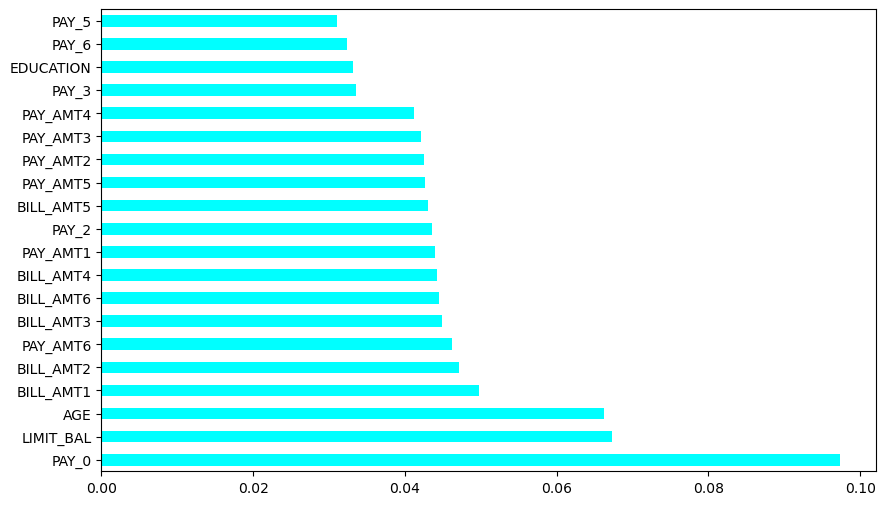

In [146]:
feature=pd.Series(extc.feature_importances_,index=x.columns)
plt.figure(figsize=(10,6))
feature.nlargest(20).plot(kind='barh', color='cyan')

In [148]:
x.corr()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.031183   0.018749 -0.021602  0.054283  0.189859   
BILL_AMT3   0.283236 -0.024563   0.013002 -0.024909  0.053710  0.179785   
BILL_AMT4   0.293988 -0.021880  -0.000451 -0.023344  0.051353  0.179125   
BILL_AMT5   0.295562 -0.017005  -0.007567 -0.025393  0.049345  0.180635   
BILL_AMT6   0.290389 -0.016733  -0.009099 -0.021207  0.047613  0.176980   
PAY_AMT1    0.195236 -0.000242  -0.037456 -0.005979  0.026147 -0.079269   
PAY_AMT2    0.178408 -0.001391  -0.030038 -0.008093  0.021785 -0.070101   
PAY_AMT3    0.210167 -0.008597  -0.039943 -0.003541  0.029247 -0.070561   
PAY_AMT4    0.203242 -0.002229  -0.038218 -0.012659  0.021379 -0.064005   
PAY_AMT5    0.217202 -0.001667  -0.040358 -0.001205  0.022850 -0.058190   
PAY_AMT6    0.219595 -0.002766  -0.037200 -0.006641  0.019478 -0.058673   

              PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL -0.296382 -0.286123 -0.267460 -0.249411  ...   0.283236   0.293988   
SEX       -0.070771 -0.066096 -0.060173 -0.055064  ...  -0.024563  -0.021880   
EDUCATION  0.121566  0.114025  0.108793  0.097520  ...   0.013002  -0.000451   
MARRIAGE   0.024199  0.032688  0.033122  0.035629  ...  -0.024909  -0.023344   
AGE       -0.050148 -0.053048 -0.049722 -0.053826  ...   0.053710   0.051353   
PAY_0      0.672164  0.574245  0.538841  0.509426  ...   0.179785   0.179125   
PAY_2      1.000000  0.766552  0.662067  0.622780  ...   0.224146   0.222237   
PAY_3      0.766552  1.000000  0.777359  0.686775  ...   0.227494   0.227202   
PAY_4      0.662067  0.777359  1.000000  0.819835  ...   0.244983   0.245917   
PAY_5      0.622780  0.686775  0.819835  1.000000  ...   0.243335   0.271915   
PAY_6      0.575501  0.632684  0.716449  0.816900  ...   0.241181   0.266356   
BILL_AMT1  0.234887  0.208473  0.202812  0.206684  ...   0.892279   0.860272   
BILL_AMT2  0.235257  0.237295  0.225816  0.226913  ...   0.928326   0.892482   
BILL_AMT3  0.224146  0.227494  0.244983  0.243335  ...   1.000000   0.923969   
BILL_AMT4  0.222237  0.227202  0.245917  0.271915  ...   0.923969   1.000000   
BILL_AMT5  0.221348  0.225145  0.242902  0.269783  ...   0.883910   0.940134   
BILL_AMT6  0.219403  0.222327  0.239154  0.262509  ...   0.853320   0.900941   
PAY_AMT1  -0.080701  0.001295 -0.009362 -0.006089  ...   0.244335   0.233012   
PAY_AMT2  -0.058990 -0.066793 -0.001944 -0.003191  ...   0.316936   0.207564   
PAY_AMT3  -0.055901 -0.053311 -0.069235  0.009062  ...   0.130011   0.300023   
PAY_AMT4  -0.046858 -0.046067 -0.043461 -0.058299  ...   0.143405   0.130191   
PAY_AMT5  -0.037093 -0.035863 -0.033590 -0.033337  ...   0.179712   0.160433   
PAY_AMT6  -0.036500 -0.035861 -0.026565 -0.023027  ...   0.182326   0.177637   

           BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
LIMIT_BAL   0.295562   0.290389  0.195236  0.178408  0.210167  0.203242   
SEX        -0.017005  -0.016733 -0.000242 -0.001391 -0.008597 -0.002229   
EDUCATION  -0.007567  -0.009099 -0.037456 -0.030038 -0.039943 -0

In [150]:
x.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 23 columns]

<Axes: >

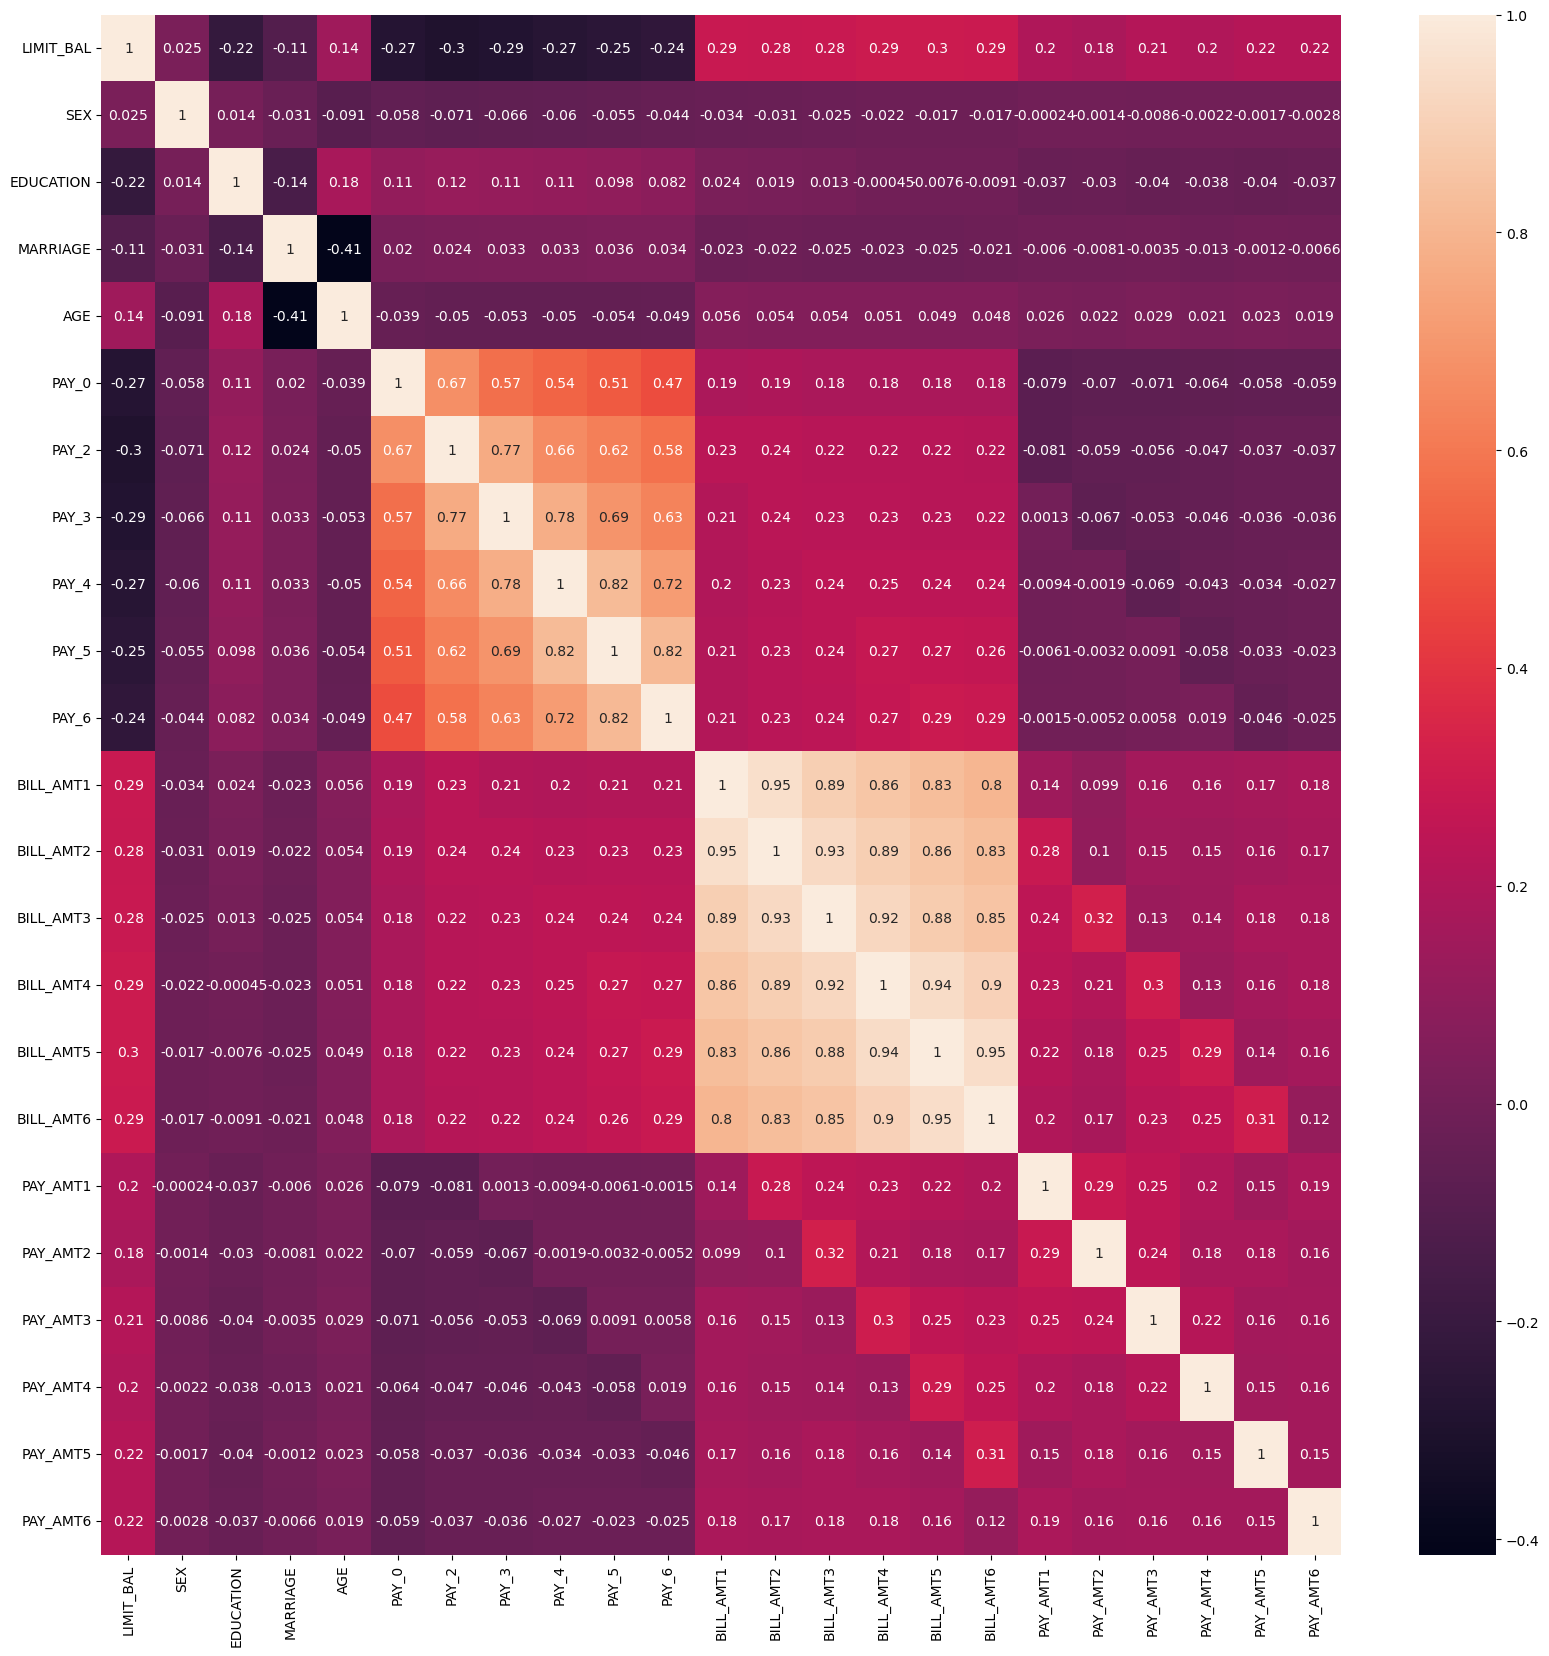

In [158]:
featurename=x.columns
colu=x.corr().index
plt.figure(figsize=(20,20))
sns.heatmap(df[colu].corr(),annot=True)

In [160]:
extc.score(x,y)

0.9993

# select Kbest

In [162]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif
skb=SelectKBest(score_func=f_classif)
feature_score=skb.fit(x,y)

In [164]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [196]:
cols2=pd.DataFrame(feature_score.scores_,columns=['featureScore'])
cols2

featureScore
0     724.068539
1      47.978854
2      23.547112
3      17.781271
4       5.788556
5    3537.714970
6    2239.169136
7    1757.466444
8    1476.845967
9    1304.591176
10   1085.402485
11     11.580532
12      6.044238
13      5.944388
14      3.094745
15      1.371087
16      0.865820
17    160.403810
18    103.291524
19     95.218011
20     97.188000
21     91.429801
22     85.089045

In [198]:
feature=pd.DataFrame(x.columns,columns=['Feature'])
feature

Feature
0   LIMIT_BAL
1         SEX
2   EDUCATION
3    MARRIAGE
4         AGE
5       PAY_0
6       PAY_2
7       PAY_3
8       PAY_4
9       PAY_5
10      PAY_6
11  BILL_AMT1
12  BILL_AMT2
13  BILL_AMT3
14  BILL_AMT4
15  BILL_AMT5
16  BILL_AMT6
17   PAY_AMT1
18   PAY_AMT2
19   PAY_AMT3
20   PAY_AMT4
21   PAY_AMT5
22   PAY_AMT6

In [200]:
concat=pd.concat([feature,cols2],axis=1)

In [202]:
concat

Feature  featureScore
0   LIMIT_BAL    724.068539
1         SEX     47.978854
2   EDUCATION     23.547112
3    MARRIAGE     17.781271
4         AGE      5.788556
5       PAY_0   3537.714970
6       PAY_2   2239.169136
7       PAY_3   1757.466444
8       PAY_4   1476.845967
9       PAY_5   1304.591176
10      PAY_6   1085.402485
11  BILL_AMT1     11.580532
12  BILL_AMT2      6.044238
13  BILL_AMT3      5.944388
14  BILL_AMT4      3.094745
15  BILL_AMT5      1.371087
16  BILL_AMT6      0.865820
17   PAY_AMT1    160.403810
18   PAY_AMT2    103.291524
19   PAY_AMT3     95.218011
20   PAY_AMT4     97.188000
21   PAY_AMT5     91.429801
22   PAY_AMT6     85.089045

In [206]:
concat.nlargest(10,'featureScore')

Feature  featureScore
5       PAY_0   3537.714970
6       PAY_2   2239.169136
7       PAY_3   1757.466444
8       PAY_4   1476.845967
9       PAY_5   1304.591176
10      PAY_6   1085.402485
0   LIMIT_BAL    724.068539
17   PAY_AMT1    160.403810
18   PAY_AMT2    103.291524
20   PAY_AMT4     97.188000

In [ ]:
# feature scalling

In [208]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaling=std.fit_transform(x)

In [210]:
scaling.shape

(30000, 23)

In [212]:
scaling

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [214]:
from sklearn.decomposition import PCA

In [216]:
pca=PCA(n_components=3)
xpca=pca.fit_transform(scaling)


In [218]:
feature=pd.DataFrame(xpca,columns=['pca1','pca2','pca3'])

In [220]:
feature

pca1      pca2      pca3
0     -1.887962  0.906109  0.487795
1     -0.764696  2.109288 -1.097314
2     -0.847408  1.072179 -0.412178
3     -0.196589  0.809022  0.818642
4     -0.840934  0.072538  1.005257
...         ...       ...       ...
29995  2.523445 -0.692641  1.657578
29996 -1.775043  0.051203  0.415313
29997  0.357457  3.312755 -0.610741
29998  0.650552 -0.722901 -0.522682
29999 -0.145564  0.809751  1.324053

[30000 rows x 3 columns]

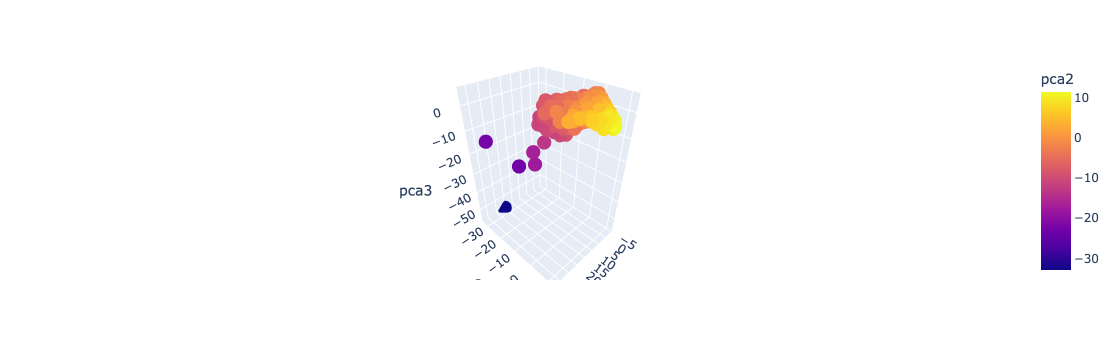

In [226]:
import plotly.express as pl
pl.scatter_3d(feature,x='pca1',y='pca2',z='pca3',color='pca2')

In [228]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,y,train_size=.80,random_state=42)

In [234]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(xtrain,ytrain)

LogisticRegression()

In [236]:
clf.score(xtrain,ytrain)

0.7977083333333334

In [238]:
clf.score(xtest, ytest)

0.793